In [1]:
import pandas as pd
import numpy as np

### Dataset 1 - Tuition fee by State 

#### Getting Dataset Name

In [2]:
tuition_fee_by_state_data = pd.read_csv('tuitionfeebystate.csv')
table_name = tuition_fee_by_state_data.columns[0]

In [3]:
tuition_fee_by_state_data = pd.read_csv('tuitionfeebystate.csv',header=1)
table_sub_name1 = tuition_fee_by_state_data.columns[1]
table_sub_name2 = tuition_fee_by_state_data.columns[17]

In [4]:
tuition_fee_by_state_data = pd.read_csv('tuitionfeebystate.csv',header=2, usecols=range(0,17))
#tuition_fee_by_state_data.columns[0]='States'
#tuition_fee_by_state_data

In [5]:
table_sub_name1

'Public Two-Year In-District Tuition and Fees'

In [6]:
datelst=[0]
for x in range(2004,2018):
    datelst.append(x)
datelst.append('1-Year % Change')
datelst.append('5-Year % Change')

In [7]:
tuition_two_year_data = pd.read_csv('tuitionfeebystate.csv',header=2, usecols=range(0,17))
tuition_two_year_data.columns = ['States', 
                                     datelst[1],
                                     datelst[2],
                                     datelst[3],
                                     datelst[4],
                                     datelst[5],
                                     datelst[6],
                                     datelst[7],
                                     datelst[8],
                                     datelst[9],
                                     datelst[10],
                                     datelst[11],
                                     datelst[12],
                                     datelst[13],
                                     datelst[14],
                                     tuition_two_year_data.columns[15],
                                     tuition_two_year_data.columns[16],
                                    ]
tuition_two_year_data.name = table_sub_name1
tuition_two_year_data.drop(axis=0,index=0).head()

,States,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,1-Year % Change,5-Year % Change
1,Alabama,"$3,526","$3,420","$3,351","$3,301","$3,155","$3,227","$3,837","$4,345","$4,368","$4,350","$4,373","$4,425","$4,470","$4,487",0%,3%
2,Arkansas,"$2,422","$2,480","$2,520","$2,513","$2,555","$2,703","$2,835","$2,885","$2,985","$3,150","$3,264","$3,490","$3,593","$3,645",1%,22%
3,Arizona,"$1,800","$1,907","$1,997","$1,981","$2,026","$2,180","$2,222","$2,331","$2,355","$2,445","$2,497","$2,538","$2,603","$2,606",0%,11%
4,California,"$1,044","$1,015",$871,$744,$706,$929,$920,"$1,212","$1,516","$1,493","$1,467","$1,459","$1,450","$1,430",-1%,-6%
5,Colorado,"$2,867","$2,992","$2,858","$2,890","$2,838","$3,146","$3,505","$3,677","$3,822","$3,924","$4,007","$4,182","$4,339","$4,458",3%,17%


#### Convert 2 year and 4 year dataframes to numeric values for columns that can be changed

In [8]:
lst =[0]
[lst.append(x) for x in range(18,34)]
tuition_four_year_data = pd.read_csv('tuitionfeebystate.csv',header=2, usecols=lst)
tuition_four_year_data.columns = ['States', 
                                     datelst[1],
                                     datelst[2],
                                     datelst[3],
                                     datelst[4],
                                     datelst[5],
                                     datelst[6],
                                     datelst[7],
                                     datelst[8],
                                     datelst[9],
                                     datelst[10],
                                     datelst[11],
                                     datelst[12],
                                     datelst[13],
                                     datelst[14],
                                     tuition_four_year_data.columns[15][:-2],
                                     tuition_four_year_data.columns[16][:-2],
                                    ]
tuition_four_year_data.name = table_sub_name2
tuition_four_year_data.drop(axis=0,index=0).head()

,States,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,1-Year % Change,5-Year % Change
1,Alabama,"$5,829","$5,991","$5,901","$6,163","$6,641","$7,374","$8,279","$8,669","$9,332","$9,599","$9,740","$9,996","$10,256","$10,530",3%,13%
2,Arkansas,"$5,921","$6,239","$6,392","$6,580","$6,581","$6,797","$7,078","$7,210","$7,474","$7,599","$7,802","$8,085","$8,396","$8,553",2%,14%
3,Arizona,"$5,271","$5,555","$5,622","$5,828","$6,214","$7,450","$9,067","$10,223","$10,394","$10,561","$10,681","$10,907","$11,119","$11,218",1%,8%
4,California,"$5,422","$5,670","$5,472","$5,818","$6,049","$7,445","$8,404","$9,679","$9,601","$9,512","$9,423","$9,505","$9,462","$9,680",2%,1%
5,Colorado,"$4,825","$5,546","$5,740","$6,387","$6,446","$7,127","$7,947","$8,529","$9,019","$9,532","$9,538","$9,999","$10,464","$10,797",3%,20%


#### Some clever iter_rows that uses the current index to rewrite values so that we may convert them to numeric

In [9]:
tuition_two_year_data.rename(index=tuition_two_year_data['States'], inplace=True)
for index,row in tuition_two_year_data.iterrows():
    tuition_two_year_data.loc[index] = row.str.replace('$','').str.replace(',','').str.replace('%','')
cols = tuition_two_year_data.columns.drop(labels='States')
tuition_two_year_data[cols] = tuition_two_year_data[cols].apply(pd.to_numeric, errors='coerce').fillna(0)
tuition_two_year_data = tuition_two_year_data.drop(['States'],axis=1)
tuition_two_year_data.head().style.format("${:.2f}")
pass

<ipython-input-9-ff01189ffd4c>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  tuition_two_year_data.loc[index] = row.str.replace('$','').str.replace(',','').str.replace('%','')


#### Same thing for the tuition four year values:

In [10]:
tuition_four_year_data.rename(index=tuition_four_year_data['States'], inplace=True)
for index,row in tuition_four_year_data.iterrows():
    tuition_four_year_data.loc[index] = row.str.replace('$','').str.replace(',','').str.replace('%','')
cols = tuition_four_year_data.columns.drop(labels='States')
tuition_four_year_data[cols] = tuition_four_year_data[cols].apply(pd.to_numeric, errors='coerce').fillna(0)
tuition_four_year_data = tuition_four_year_data.drop(['States'],axis=1)
tuition_four_year_data.head().style.format("${:.2f}")
pass

<ipython-input-10-f7308da188b5>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  tuition_four_year_data.loc[index] = row.str.replace('$','').str.replace(',','').str.replace('%','')


<AxesSubplot:title={'center':'Public Two-Year In-District Tuition and Fees'}>

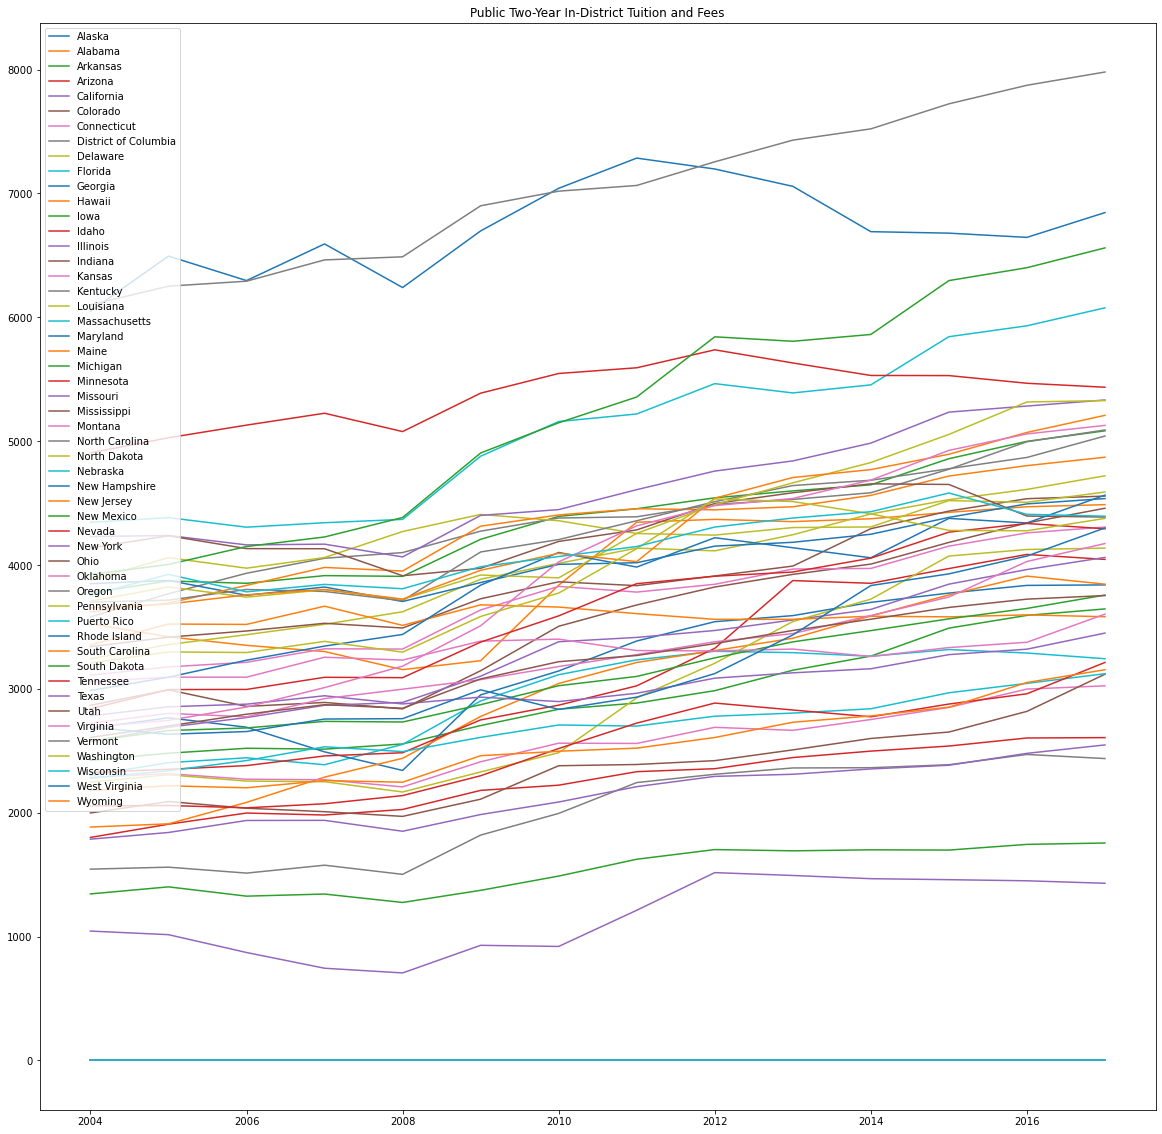

In [11]:
tuition_yoy_2year = tuition_two_year_data.drop(['1-Year % Change','5-Year % Change'], axis=1)
tuition_yoy_2year.T.plot(kind='line',figsize=(20,20), title=table_sub_name1)

<AxesSubplot:title={'center':'Public Four-Year In-State Tuition and Fees'}>

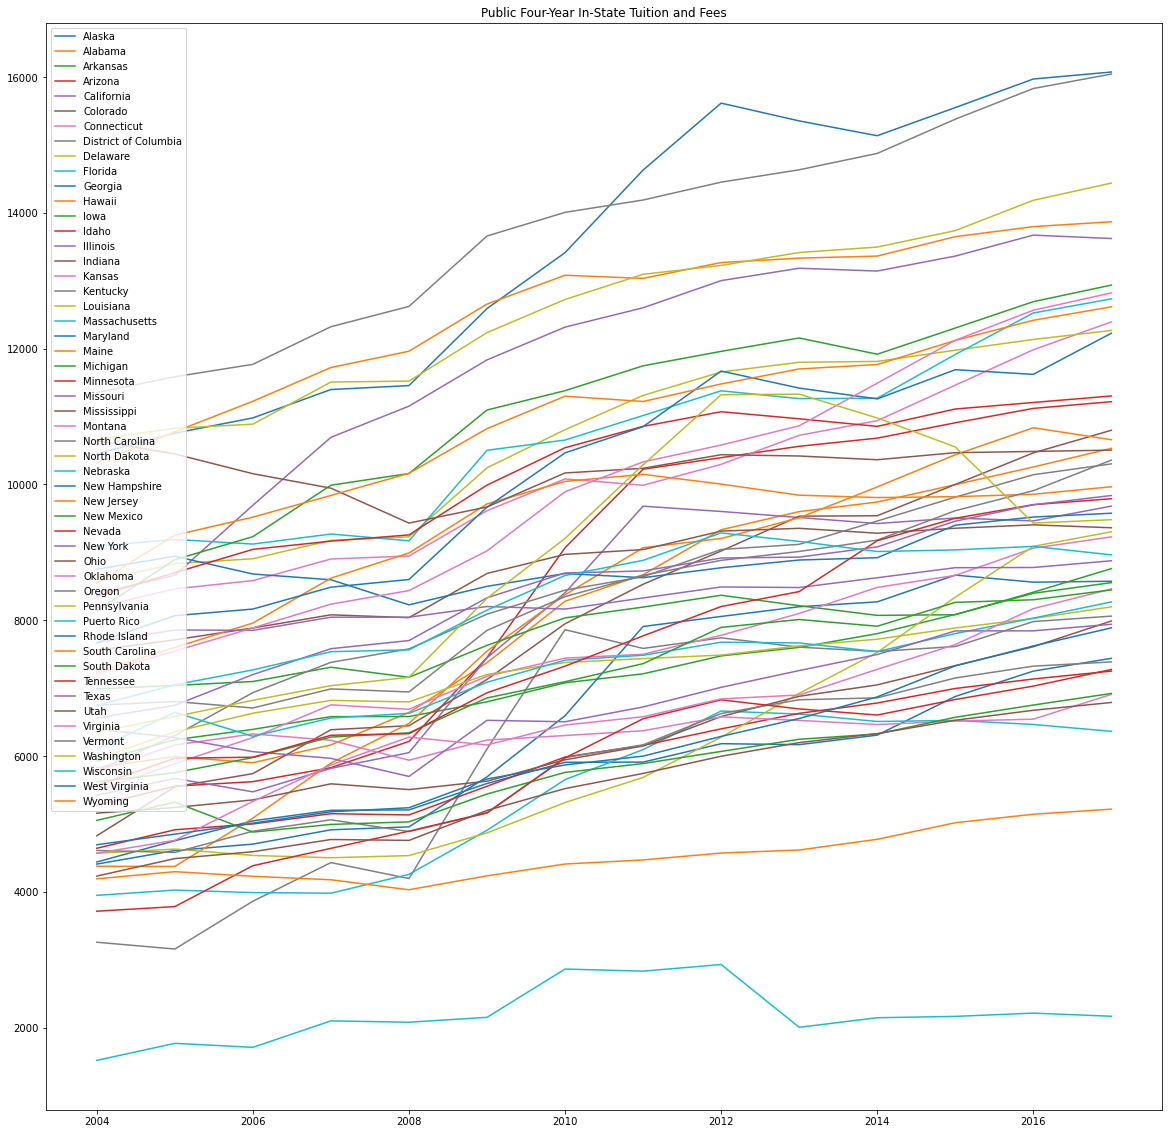

In [12]:
tuition_yoy_4year = tuition_four_year_data.drop(['1-Year % Change','5-Year % Change'], axis=1).T
tuition_yoy_4year.plot(kind='line',figsize=(20,20), title=table_sub_name2)

#### Show top 5 States with Tuition Increases in 4 year schools

In [13]:
topvals_filter = tuition_yoy_4year.pct_change().sum()
tuition_yoy_4year[topvals_filter.sort_values(ascending=False).index[:5]].T.style.format("${:.2f}")

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
District of Columbia,$3257.00,$3157.00,$3861.00,$4430.00,$4195.00,$6104.00,$7860.00,$7584.00,$7740.00,$7603.00,$7539.00,$7612.00,$7979.00,$8060.00
Hawaii,$4376.00,$4373.00,$5085.00,$5896.00,$6480.00,$7545.00,$8374.00,$9067.00,$9203.00,$9508.00,$9962.00,$10436.00,$10834.00,$10658.00
Colorado,$4825.00,$5546.00,$5740.00,$6387.00,$6446.00,$7127.00,$7947.00,$8529.00,$9019.00,$9532.00,$9538.00,$9999.00,$10464.00,$10797.00
Arizona,$5271.00,$5555.00,$5622.00,$5828.00,$6214.00,$7450.00,$9067.00,$10223.00,$10394.00,$10561.00,$10681.00,$10907.00,$11119.00,$11218.00
Louisiana,$4567.00,$4629.00,$4535.00,$4501.00,$4533.00,$4867.00,$5314.00,$5684.00,$6277.00,$6922.00,$7525.00,$8339.00,$9087.00,$9302.00


___

### Dataset 2 - Unemployment Data

#### First thing to do - rename Unnamed column, then drop unnamed column

In [14]:
unempdata = pd.read_csv('unemploymentdata.csv')
unempdata.dropna(how='all', inplace=True)
unempdata.fillna(0,inplace=True)
unempdata['Unnamed: 0'] = (unempdata['Unnamed: 0']*1).astype(int)
unempdata.index = unempdata['Unnamed: 0']
unempdata.drop(['Unnamed: 0'], axis=1, inplace=True)
unempdata.drop(index=2019, inplace=True)
unempdata.head()

,Advanced Economies,Argentina,Australia,Austria,Belgium,Bulgaria,Bahrain,Belarus,Brazil,Canada,...,Thailand,Tunisia,Turkey,"Taiwan, China",Uruguay,United States,"Venezuela, RB",Vietnam,World (WBG members),South Africa
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1990,5.800582,0.0,6.943297,5.373002,6.550260,0.00000,0.0,0.0,0.0,8.15000,...,0.0,0.0,0.0,1.658333,0.0,5.616667,0.0,0.0,0.0,0.0
1991,6.728688,0.0,9.614137,5.823096,6.439812,0.00000,0.0,0.0,0.0,10.31667,...,0.0,0.0,0.0,1.533333,0.0,6.850000,0.0,0.0,0.0,0.0
1992,7.511064,0.0,10.750080,5.941711,7.088092,13.23500,0.0,0.0,0.0,11.21667,...,0.0,0.0,0.0,1.500000,0.0,7.491667,0.0,0.0,0.0,0.0
1993,7.936175,0.0,10.866170,6.811381,8.619130,15.85583,0.0,0.0,0.0,11.37500,...,0.0,0.0,0.0,1.425000,0.0,6.908333,0.0,0.0,0.0,0.0
1994,7.715897,0.0,9.705695,6.545480,9.753554,14.06583,0.0,0.0,0.0,10.39167,...,0.0,0.0,0.0,1.566667,0.0,6.100000,0.0,0.0,0.0,0.0


### Next format all values to  switch use only two decimal places and plot
#####  you can scroll in by doubleclicking the chart

<AxesSubplot:title={'center':'Unemployment Data - 1990 to 2018 (incomplete)'}, xlabel='Unnamed: 0'>

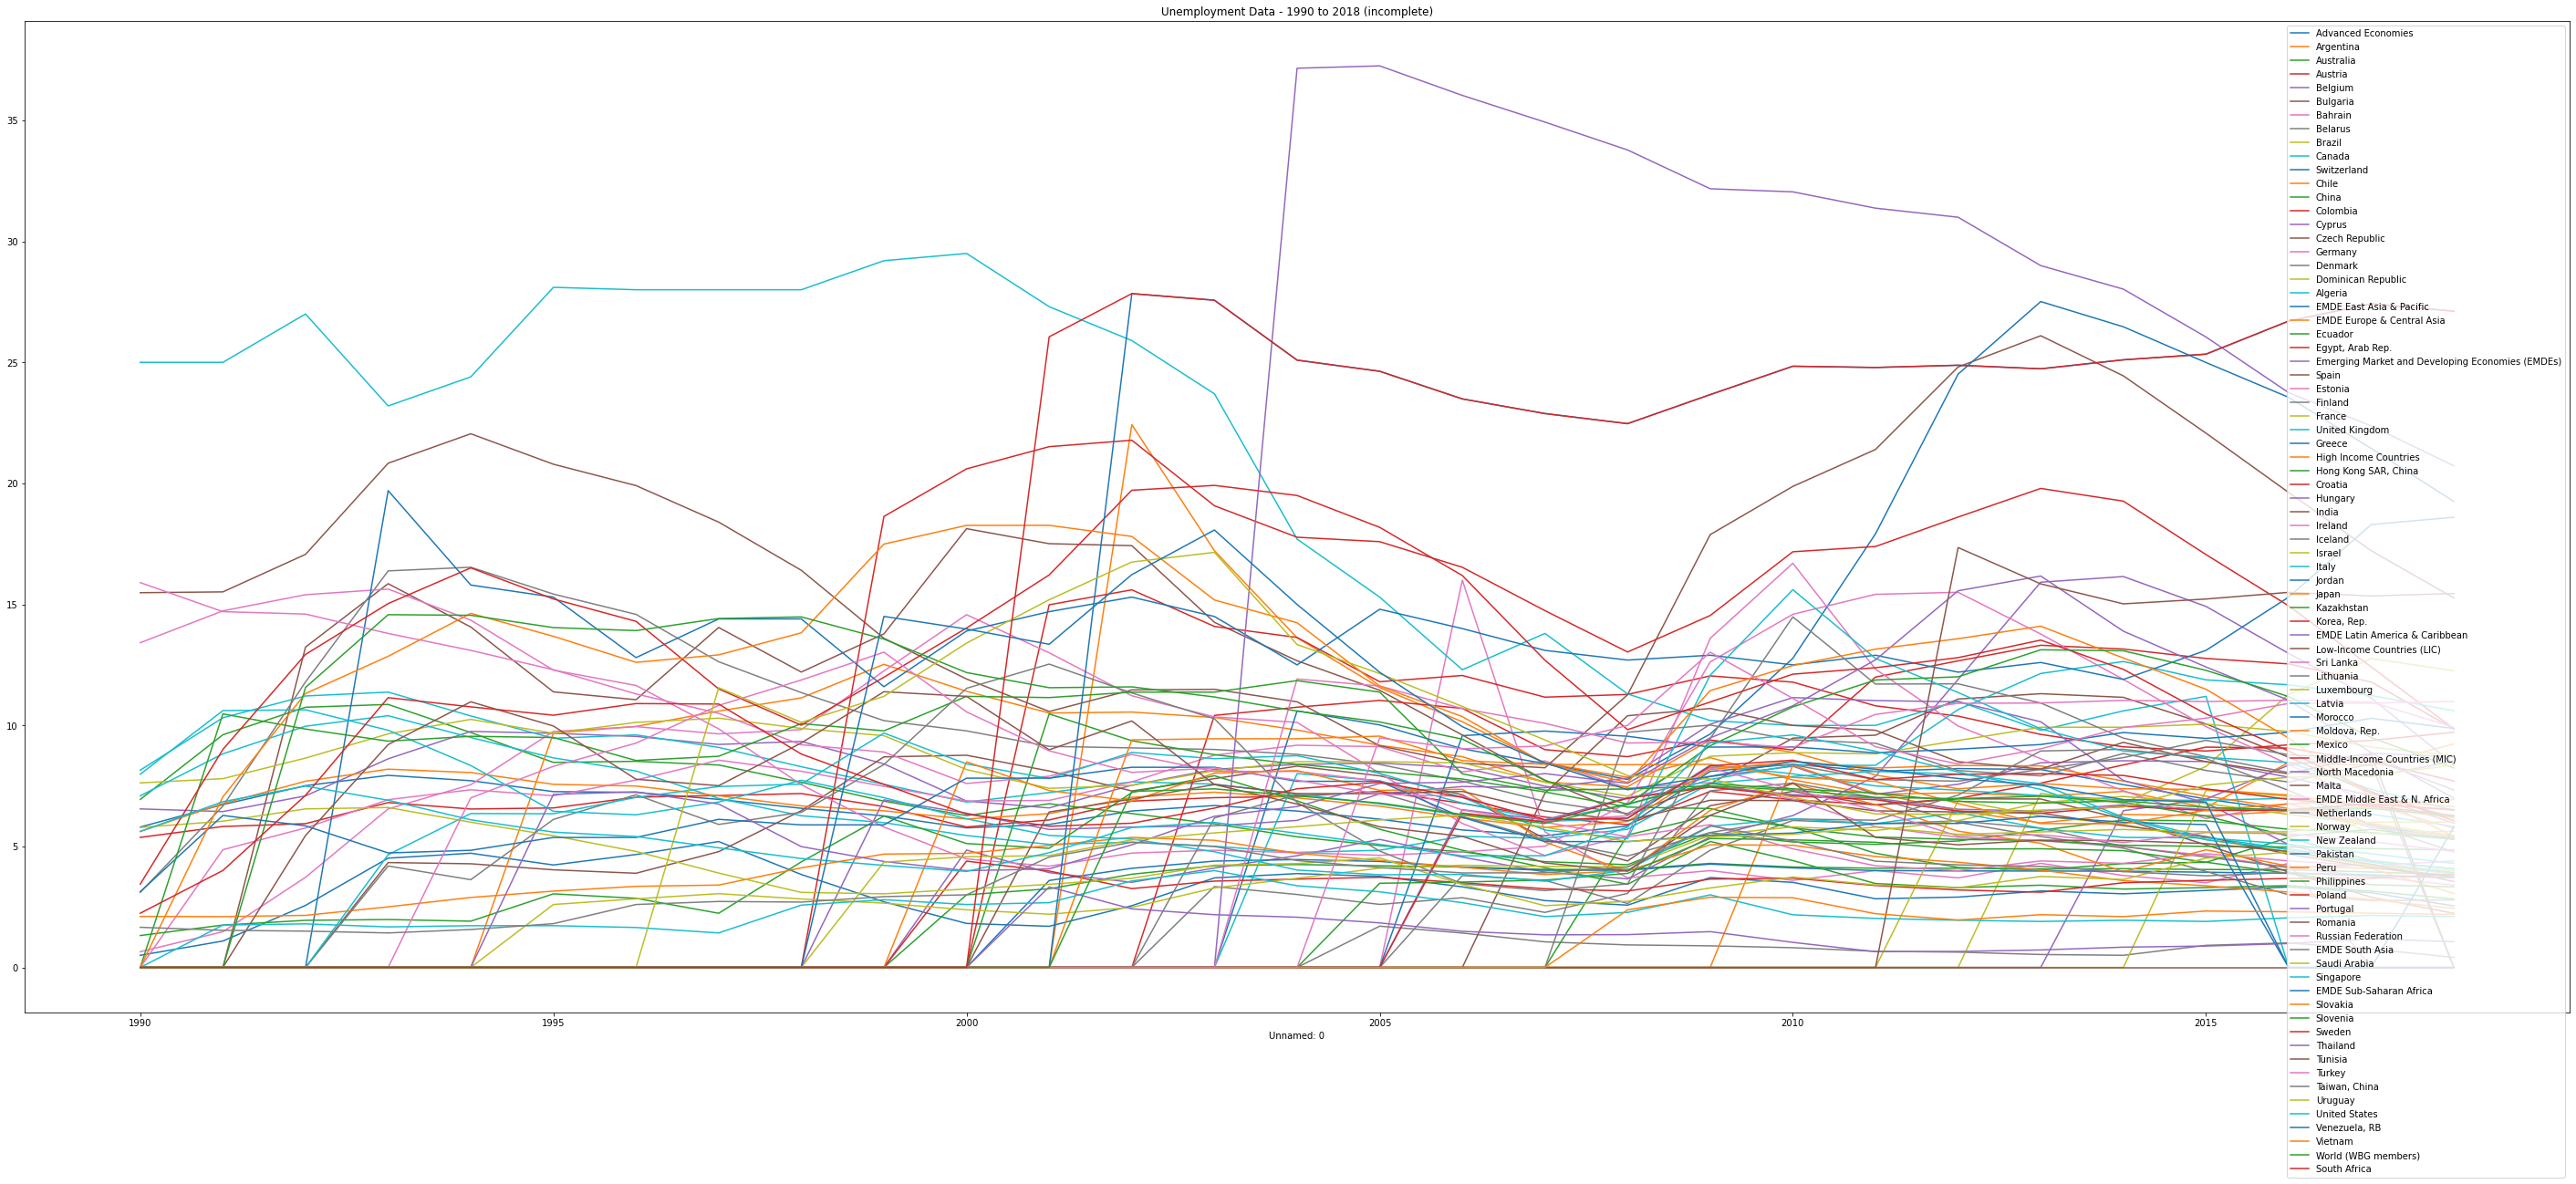

In [15]:
unempdata.style.format("{:.1f}%")
unempdata.plot(figsize=(50,20), title="Unemployment Data - 1990 to 2018 (incomplete)")

#### below we can do a subset of data, lets say only those in the european union

##### source = https://europa.eu/european-union/about-eu/countries_en

In [16]:
EU_list = ["Austria", "Italy", "Belgium", "Latvia", "Bulgaria", "Lithuania", "Croatia", "Luxembourg", "Cyprus", 
"Malta", "Czechia", "Netherlands", "Denmark", "Poland", "Estonia", "Portugal", "Finland", "Romania", "France", 
"Slovakia", "Germany", "Slovenia", "Greece", "Spain", "Hungary", "Sweden", "Ireland"] 

<AxesSubplot:title={'center':'Unemployment Data of EU - 1990 to 2018 (incomplete)'}, xlabel='Unnamed: 0'>

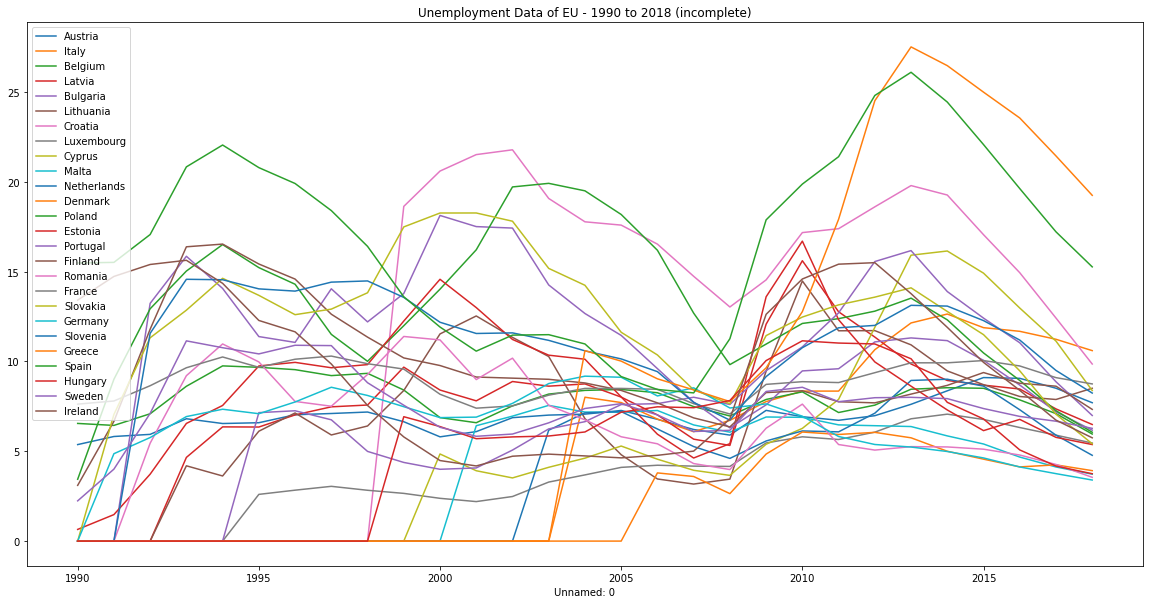

In [17]:
unempdata.filter(items=EU_list).plot(figsize=(20,10), title="Unemployment Data of EU - 1990 to 2018 (incomplete)")

### Dataset 3 - Untidy.csv

In [18]:
untidy_data = pd.read_csv('untidy.csv')
untidy_data

,species,habitat,weight,length,latitude/longitutde,date
0,Alligator mississippiensis,swamp,431 lb,4 ft 2,"29.531, -82.184","Sept 15,2015"
1,Puma concolor,forest,125 lb,2.2m,"29.125, -81.682",8/10/2015
2,Ursus americanus,forest,88 kg,133 cm,"N29°7'30""/W81° 40'55.2""",7/13/2015


#### In this small dataset we have mixed weights, mixed heights, coordinates and date types.

In [19]:
def kg_to_lb_convert(kg):
    return (kg*2.204623)

In [20]:
newval =  str(int(kg_to_lb_convert(int(untidy_data['weight'][2][:2]))))+' lb'
untidy_data['weight'][2] =  newval
untidy_data['weight'][2]

'194 lb'

In [21]:
def inch_to_meter(inch):
    return(inch*0.0254)
def meter_to_cm(meter):
    return(meter*100)

In [22]:
newval = int(untidy_data['length'][0][-6])*12+int(untidy_data['length'][0][-1])
newval = inch_to_meter(newval)
newval = str(meter_to_cm(newval))
newval

'127.0'

In [23]:
untidy_data['length'][0] = str(newval[:3]+' cm')
untidy_data['length'][1] = str(str(meter_to_cm(float(untidy_data['length'][1][:3])))[:3] + ' cm')

In [24]:
untidy_data.rename(columns={'latitude/longitutde ':'latitude/longitude'}, inplace=True, errors='raise')

In [67]:
def dms_to_dd(d, m, s):
    dd = (float(d), float(m)/60, float(s)/3600)
    return sum(dd)

In [68]:
coords = untidy_data['latitude/longitude'][2].split('/')
coords1 = coords[0][1:3],coords[0][4:5],coords[0][6:8]
coords2 = coords[1][1:3],coords[1][5:7],coords[1][8:12]

In [69]:
type(coords1[1])

str

In [74]:
lat = dms_to_dd(coords1[0],coords1[1],coords1[2])
long = dms_to_dd(coords2[0],coords2[1],coords2[2])
newval=str(lat)+' '+ str(long)

In [75]:
untidy_data['latitude/longitude'][2]=newval

In [92]:
olddate=untidy_data['date'][0]
olddate = str(olddate[:3]+olddate[5:])
olddate

'Sep 15,2015'

In [101]:
from datetime import datetime, date,time
newdate = datetime.strptime(olddate,"%b %d,%Y")
newdate= datetime.strftime(newdate, "%m/%d/%Y")
untidy_data['date'][0]=newdate

In [102]:
untidy_data

,species,habitat,weight,length,latitude/longitude,date
0,Alligator mississippiensis,swamp,431 lb,127 cm,"29.531, -82.184",09/15/2015
1,Puma concolor,forest,125 lb,220 cm,"29.125, -81.682",8/10/2015
2,Ursus americanus,forest,194 lb,133 cm,29.125 81.682,7/13/2015
